# RED BLUE HACKENBUSH  

## Introduction
Red Blue Hackenbush in a partisan Two Player Zero Sum graph game, whose rules are as follows:-  
1) Edges are of two colors  
    a) Red  
    b) Blue  
2) There are two players, Left and Right. The left player generally goes first, and can only remove the blue edge, while the right player can only remove the red edge  
3) All the nodes must be connected to one of the ground nodes. Whenever an edge is removed, all the nodes that are disconnected from all the ground nodes, along with it's edges, are deleted  
4) The game ends when the current player is not able to make a move, who is declared the loser of the game  
Since the game can end only when one of the players is not able to make a move, and hence _atleast_ one type of edges are no more present in the graph, Red-Blue Hackenbush is a __zero sum game__, i.e., if one player wins, the other must lose.

## Variants  
We'll be trying to predict the winner (given both players play __optimally__) for one specific variant of the Red-Blue Hackenbush, where every connected component is a __stalk__ / __rod__, which is polynomial time solvable.  
We'll also ponder over the tree variant of the game, finding an optimal solution for which is NP Hard.

## Game Values
Each _independent connected component of the graph_ can be assigned a __value__, and the sum of values of all these connected components will help us to predict the winner of the game.

In [6]:
'''initial code setup'''
%config IPCompleter.greedy=True
%matplotlib inline
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout, to_agraph
import matplotlib.pyplot as plt
from copy import deepcopy
class Graph:
    def __init__(self):
        self.nodecolors = {}
        self.G = nx.DiGraph()
    
    def drawGraph(self):
        plt.gca().invert_yaxis()
        pos =graphviz_layout(self.G, prog='dot')
        edges = self.G.edges()
        colors = [self.nodecolors[u][v] for u,v in edges]
        nx.draw(self.G, pos, with_labels=False, arrows=False, edge_color=colors, node_color='black', width=5)
        plt.show()

    def add_edge(self, From, To, color='black'):
        self.G.add_edge(From,To)
        if From in self.nodecolors:
            self.nodecolors[From][To] = color
        else:
            self.nodecolors[From] = {To:color}

    def createGraph(self):
        self.G.add_node("ROOT")
        for i in range(5):
            self.G.add_node("Child_%i" % i)
            self.G.add_node("Grandchild_%i" % i)
            self.G.add_node("Greatgrandchild_%i" % i)
            self.add_edge("ROOT", "Child_%i" % i,'b')
            self.add_edge("Child_%i" % i, "Grandchild_%i" % i,'r')
            self.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i,'b')
    
    def remove_node(self,node):
        if node in self.G.nodes():
            nodes = deepcopy(self.G[node])
            for v in nodes:
                self.remove_edge(node,v)
            self.G.remove_node(node)
    
    def remove_edge(self,From,To):
        if From in self.G and To in self.G[From]:
            self.G.remove_edge(From,To)
            self.nodecolors[From].pop(To,None)
            self.remove_node(To)

### Example
The following code snippet provides an example of the rules of the game

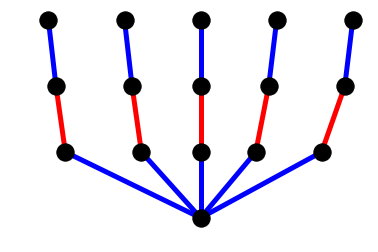

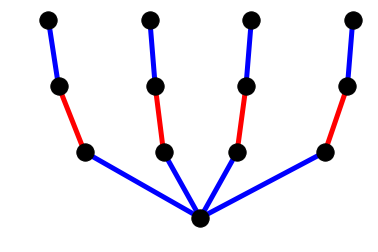

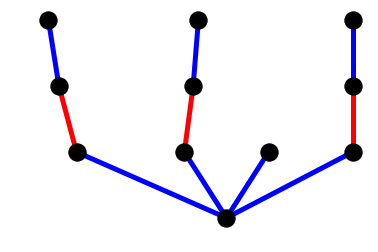

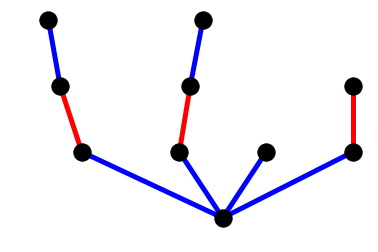

In [5]:
G = Graph()            
G.createGraph()
G.drawGraph()
#left player moves
#disconnects one of the components from the root, all the components that got disconnected from root also got removed
G.remove_edge('ROOT','Child_1')
G.drawGraph()
#right player moves 
#removes an intermediate edge
G.remove_edge('Child_3','Grandchild_3')
G.drawGraph()
#left player moves
#one of the top edges get deleted, so only one node is removed.
G.remove_edge('Grandchild_2','Greatgrandchild_2')
G.drawGraph()

### Part I: Stalk Red-Blue Hackenbush  
The stalk Red-Blue Hackenbush is a particular case of the game, where all the connected components are a _stalk_, for example

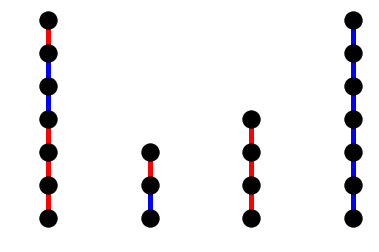

In [14]:
G = Graph()
G.add_edge(0,1,'r')
G.add_edge(1,2,'r')
G.add_edge(2,3,'r')
G.add_edge(3,4,'b')
G.add_edge(4,5,'b')
G.add_edge(5,6,'r')
G.add_edge(7,8,'b')
G.add_edge(8,9,'r')
G.add_edge(10,11,'r')
G.add_edge(11,12,'r')
G.add_edge(12,13,'r')
for i in range(14,20):
    G.add_edge(i,i+1,'b')
G.drawGraph()

### Calculating the value of a board
The value of a board in stalk arrangement is calculated component-wise. Let us try to understand it with the above example:-  
Consider the rightmost stalk. It consists of six blue edges, and has no red edges. For such types of stalk, having all edges of the same color, the ans is equal to the number of edges in the graph. Hence the value for this stalk is $6$.  
#### Rule #1: The absolute value of a stalk having all edges of the same color is n, where n is the no of edges in the stalk  
Now consider the 3rd stalk, where all the edges are of the same colorm but red. The absolute value as per rule #1 is $3$, but since the stalk starts with a red edge, a negative value is assigned to it. Hence, the value for this stalk is $-3$.  
#### Rule #2: The stalks starting with a red edge has a negative value assigned to it  
Consider the 2nd Hackenbush, consisting of a blue and a red edge, and has a score of $\frac{1}{2}$ (Surprisingly, a fraction). The reason of this value will become clearer with discussion of the next rule.  
Now, we move on to the first stalk, and observe the following:-  
1) The stalk starts with a red edge  
2) The first _3_ edges are red, call this value 'n'  
3) The first blue edge is the _4th_ edge of the stalk  
4) The configuration after the first blue edge is  BR  

#### Rule #3:-
Now, we calculate absolute value of this stalk in the following way:-  
1) The integral part of the value equals __n-1__  
2) The fractional part is calculated using the edges from after the point of first differently colored edge.  Move one by one to the top of the stalk, assign a binary value '0' to an edge if it's color differs from the color of base edge, otherwise assign a binary value of '1'  
For the above example, this value is : (.1)<sub>2</sub>  
3) Append 01 to the value obtained above
Therefore, the final fractional value in the above example is : (.011)<sub>2</sub>  
4) The final absolute value of the stalk is the sum of integral and fractional values  
Hence, the final absolute value of the first stalk is (2)<sub>10</sub> + (.011)<sub>2</sub>, which is equal to $2\frac{3}{8}$  

Now, since the first edge was red, the signed value of the first stalk equals $-2\frac{3}{8}$
We can now observe that the 3rd stalk is a corner case of rule #3, where n=1, and there is no edge after the first mismatch, and hence the value $\frac{1}{2}$

The final value of the board is simply the sum of values of all the stalks. Hence the value of the board in the above example is $-2\frac{3}{8}+\frac{1}{2}-3+6=1\frac{1}{8}$  

#### What to infer from this value?   
Whenever the final value of a board is positive, the left player will always win.  
If the final value is negative, the right player will always win.
If the value is zero, whoever plays first, _loses_ the game!

Hence, we can look at the above board, and say with certainity that the first player will definitely win, provided both the players are smart and play optimally :)